# Círculos de Mohr vs trayectoria de esfuerzos
© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

Este notebook puede ejecutarse en línea →  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_mechanics/blob/main/notebooks/mohr_circles_and_stress_paths.ipynb)

## Módulos requeridos y configuración global de figuras

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    # run('pip install ipympl', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()


# %matplotlib widget
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman", "cmr", "cmr10", "DejaVu Serif"],  # or 
    "mathtext.fontset": "cm",  # Use Computer Modern fonts for math
    "axes.formatter.use_mathtext": True,  # Use mathtext for axis labels
    "axes.unicode_minus": False,   # Use standard minus sign instead of a unicode character
})

## Funciones

In [2]:
def get_xy_from_angle(angle, r, c):
    x, y = r * np.cos(2*np.deg2rad(angle)) + c, r * np.sin(2*np.deg2rad(angle))
    return x, y

def plot_mohr_circle(
    𝜎_xx, 𝜎_yy, 𝜏_xy, plot_envelope=False, envelope={'c': 5, '𝜙': 27},
    plot_pole=False, plot_plane=False, 𝛼=0, xlim=None, ylim=None, **kwargs
):
    if type(envelope) == str:  # This is for interpreting it from the widget
        envelope = ast.literal_eval('{' + envelope + '}')

    c = 0.5 * (𝜎_xx + 𝜎_yy)
    r = np.sqrt((𝜎_xx - c) ** 2 + 𝜏_xy**2)
    𝜎_1 = r * np.cos(0) + c
    𝜎_3 = r * np.cos(np.pi) + c

    tension_state = {
        "𝜎_1": 𝜎_1,
        "𝜎_3": 𝜎_3,
        "𝜎_xx": 𝜎_xx,
        "𝜎_yy": 𝜎_yy,
        "𝜏_xy": 𝜏_xy,
        "s": 0.5 * (𝜎_1 + 𝜎_3),
        "t": 0.5 * (𝜎_1 - 𝜎_3),
        "p": 1 / 3 * (𝜎_1 + 2 * 𝜎_3),
        "q": 𝜎_1 - 𝜎_3,
    }

    angles4circ = np.linspace(0, 2 * np.pi, 200)

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=kwargs.get('figsize'))
    ax.plot(r * np.cos(angles4circ) + c, r * np.sin(angles4circ), c="k")  # Mohr circle
    ax.axhline(y=0, c="k")

    params = {'ls': "", "fillstyle": 'none', "markeredgewidth": 2, "ms": 7}
    # Cartesian stresses 𝜎_xx, 𝜏_xy and 𝜎_yy, (-)𝜏_xy
    label = ("$\\sigma_{xx}=$" + f"{𝜎_xx:.1f}" + ",\n$\\tau_{xy}=$" + f"{𝜏_xy:.1f}")
    ax.plot(𝜎_xx, 𝜏_xy, c="C1", marker="s", label=label, **params)
    label = ("$\\sigma_{yy}=$" + f"{𝜎_yy:.1f}" + ",\n$\\tau_{yx}=$" + f"{𝜏_xy:.1f}")
    ax.plot(𝜎_yy, -𝜏_xy, c="C0", marker="s", label=label, **params)
    # Principal stresses 𝜎_1, 𝜎_3
    label = "$\\sigma_{1}=$" + f"{𝜎_1:.1f}"  # 𝜎_1
    ax.plot(𝜎_1, 0, c="C3", marker= "o", label=label, **params)
    label = "$\\sigma_{3}=$" + f"{𝜎_3:.1f}"  # 𝜎_3
    ax.plot(𝜎_3, 0, c="C4", marker= "o", label=label, **params)
    ax.plot(c, 0, ls="", c="k", marker=(8, 2, 0), ms=10,  # Mean stress
        label="$\\sigma_\\mathrm{m}=$" + f"{c:.1f}")
    label = "$\\tau_\mathrm{max}=$" + f"{r:.1f}"  # 𝜏_max
    ax.plot(c, r, c="C5", marker="v", label=label, **params)

    pole = (𝜎_xx, -1 * 𝜏_xy)
    if plot_pole:  # Pole and stress on a plane
        ax.axvline(x=pole[0], c="C1", ls="-", lw=1.25)
        ax.axhline(y=pole[1], c="C0", ls="-", lw=1.25)
        ax.plot(*pole, ls="", c="k", marker=".", fillstyle='full', ms=7,
            label=f"Pole$_\\sigma={pole[0]:.1f}$,\nPole$_\\tau= {pole[1]:.1f}$")
    if plot_plane:
        𝛽 = 0.5 * np.degrees(np.arctan2(2 * 𝜏_xy, 𝜎_xx - 𝜎_yy))
        𝜃 = 𝛼 + 𝛽
        pl_𝜎, pl_𝜏 = get_xy_from_angle(𝜃, r, c)
        label = f"Plane at {𝛼:.1f}" + "$^{\circ}\\circlearrowleft$\nfrom Plane $\\sigma_x$"
        ax.plot((pl_𝜎, pole[0]), (pl_𝜏, pole[1]), c="C1", ls="--", lw=1.25, label=label)
        label="Plane at $2\\theta=$" + f"{2*𝜃:.1f}" + \
            "$^{\\circ}\\circlearrowleft$\nfrom Plane $\\sigma_1$"
        ax.plot((pl_𝜎, c), (pl_𝜏, 0), c="C3", ls="--", lw=1.25, label=label)
        label = "Stress state on the plane\n" + "$\\sigma_\\mathrm{n}=$" + \
            f"{pl_𝜎:.1f}" + ", $\\tau_\mathrm{n}=$" + f"{pl_𝜏:.1f}"
        ax.plot(pl_𝜎, pl_𝜏, ls="", c="k", marker="o", fillstyle='none', label=label)

    if plot_envelope:  # Failure envelope
        tan_𝜙 = np.tan(np.radians(envelope['𝜙']))
        c_env = envelope['c']
        label = "Failure criterion\n$\\tau_\\mathrm{n}=" + f"{envelope['c']}+" + \
            "\\tan" + f"{envelope['𝜙']}^\\circ" + "\\sigma_\\mathrm{n}$"
        xlim = ax.get_xlim() if xlim is None else xlim
        ylim = ax.get_ylim() if ylim is None else ylim
        x_env = np.array([-9e9, 9e9])
        ax.plot(x_env, tan_𝜙 * x_env + envelope['c'], c="r", label=label)

    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax.grid(True, ls="--")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.set_aspect("equal", anchor=None)
    ax.set(
        xlabel="Normal stress, $\\sigma_\\mathrm{n}$",
        ylabel="Shear stress, $\\tau_\\mathrm{n}$",
        xlim=xlim,
        ylim=ylim
    )
    return fig, tension_state

In [3]:
def plot_all_mohr_circles(
        stages, envelope={'c': 20, '𝜙': 35}, xlim=None, ylim=None, **kwargs):
    theta = np.linspace(0, 2 * np.pi, 200)
    # sigma = np.linspace(0, sig_1 * factor, 200)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=kwargs.get('figsize'), layout='constrained')
    for i, st in enumerate(stages):
        sigma_xx, sigma_yy, tau_xy = st['𝜎_xx'], st['𝜎_yy'], st['𝜏_xy']
        c = 0.5 * (sigma_xx + sigma_yy)
        r = np.sqrt((sigma_xx - c) ** 2 + tau_xy**2)
        sig_1 = r * np.cos(0) + c
        sig_3 = r * np.cos(np.pi) + c
        # ax.axhline(y=0, xmin=0, xmax=sig_1 * factor, c="k")
        ax.plot(r * np.cos(theta) + c, r * np.sin(theta), label=f'Stage {i}')  # Mohr circle
    # Failure envelope
    tan_𝜙 = np.tan(np.radians(envelope['𝜙']))
    c_env = envelope['c']
    label = ("Failure criterion \n $\\tau_\mathrm{n} = "+ f"{c_env} + "
                + "\\tan" + f"{envelope['𝜙']}^\circ" + "\sigma_\mathrm{n}$")
    xlim = ax.get_xlim() if xlim is None else xlim
    ylim = ax.get_ylim() if ylim is None else ylim
    x_env = np.array([-9e9, 9e9])
    ax.plot(x_env, tan_𝜙 * x_env + c_env, c="r", lw=2.25, label=label)

    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax.grid(True, ls="--")
    ax.spines[["left", "bottom"]].set_linewidth(1.5)
    ax.tick_params(width=1.5)
    ax.set_aspect("equal", adjustable=None, anchor='C')
    ax.set(
        xlabel="Normal stress, $\sigma_\mathrm{n}$",
        ylabel="Shear stress, $\\tau_\mathrm{n}$",
        xlim=xlim,
        ylim=ylim)
    plt.show()
    return fig

In [4]:
def plot_stress_path(stages, envelope={"c": 10, "𝜙": 30}, **kwargs):
    # Mohr-Coulomb envelope
    phi_r = np.radians(envelope["𝜙"])
    c = envelope["c"]
    𝜎1, 𝜎3, s, t, p, q = [], [], [], [], [], []
    for st in stages:
        𝜎1.append(st["𝜎_1"])
        𝜎3.append(st["𝜎_3"])
        s.append(st["s"])
        t.append(st["t"])
        p.append(st["p"])
        q.append(st["q"])

    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=kwargs.get('figsize'), layout='constrained')
    quiver = lambda x, y: (
        0.5 * (x[1:] + x[:-1]),
        0.5 * (y[1:] + y[:-1]),
        np.diff(x)/np.sqrt(np.diff(x)**2+np.diff(y)**2),
        np.diff(y)/np.sqrt(np.diff(x)**2+np.diff(y)**2),
    )

    x_env = np.array([-9e9, 9e9])
    # sigma_1, sigma_3
    𝜎1, 𝜎3 = np.array(𝜎1), np.array(𝜎3)
    ax0.plot(𝜎3, 𝜎1, ls="--", c="k", marker="o", mfc="0.7", lw=0.75)
    ax0.quiver(*quiver(𝜎3, 𝜎1), pivot="mid", angles="xy")
    label = (
        "Failure criterion: \n$\sigma_1' =  "
        + "\\frac{2c' \cos \phi'}{1 - \sin \phi'} + "
        + "\sigma_3' \\frac{1 + \sin \phi'}{1 - \sin \phi'} $"
    )
    𝜎1_𝜎3_int = 2 * c * np.cos(phi_r) / (1 - np.sin(phi_r))
    𝜎1_𝜎3_slope = (1 + np.sin(phi_r)) / (1 - np.sin(phi_r))
    xlim = ax0.get_xlim()
    ylim = ax0.get_ylim()
    ax0.plot(x_env, 𝜎1_𝜎3_slope * x_env + 𝜎1_𝜎3_int, c="#BB5566", lw=2.25, label=label)
    ax0.set(xlabel="$\sigma_{3}'$", ylabel="$\sigma_{1}'$", title="Principal stresses")
    ax0.set_xlim((0, 1.2 * xlim[1]))
    ax0.set_ylim((0, 1.2 * ylim[1]))

    # s, t
    s, t = np.array(s), np.array(t)
    ax1.plot(s, t, ls="--", c="k", marker="o", mfc="0.7", lw=0.75)
    ax1.quiver(*quiver(s, t), pivot="mid", angles="xy")
    label = "Failure criterion: \n$t = c' \cos \phi' + s'\,\sin \phi' $"
    s_t_int = c * np.cos(phi_r)
    s_t_slope = np.sin(phi_r)
    xlim = ax1.get_xlim()
    ylim = ax1.get_ylim()
    ax1.plot(x_env, s_t_slope * x_env + s_t_int, c="#004488", lw=2.25, label=label)
    ax1.set(xlabel="$s'$", ylabel="$t$", title="MIT (Lambe)")
    ax1.set_xlim((0, 1.2 * xlim[1]))
    ax1.set_ylim((0, 1.2 * ylim[1]))

    # p, q
    p, q = np.array(p), np.array(q)
    ax2.plot(p, q, ls="--", c="k", marker="o", mfc="0.7", lw=0.75)
    ax2.quiver(*quiver(p, q), pivot="mid", angles="xy")
    label = (
        "Failure criterion: \n$q =  "
        + "\\frac{6\cos \phi'}{3 - \sin \phi'} +"
        + "\\frac{6\sin \phi'}{3 - \sin \phi'} p'$"
    )
    p_q_int = c * 6 * np.cos(phi_r) / (3 - np.sin(phi_r))
    p_q_slope = 6 * np.sin(np.arctan(phi_r)) / (3 - np.sin(np.arctan(phi_r)))
    xlim = ax2.get_xlim()
    ylim = ax2.get_ylim()
    ax2.plot(x_env, p_q_slope * x_env + p_q_int, c="#DDAA33", lw=2.25, label=label)
    ax2.set(xlabel="$p'$", ylabel="$q$", title="Cambridge")
    ax2.set_xlim((0, 1.2 * xlim[1]))
    ax2.set_ylim((0, 1.2 * ylim[1]))

    for ax in (ax0, ax1, ax2):
        ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), frameon=False, fontsize='large')
        ax.grid(True, ls=":")
        ax.spines[["left", "bottom"]].set_linewidth(1.5)
        ax.tick_params(width=1.5)
    plt.show()
    return fig


## Herramienta No. 1

Estado de esfuerzos en la misma etapa para diferentes puntos.

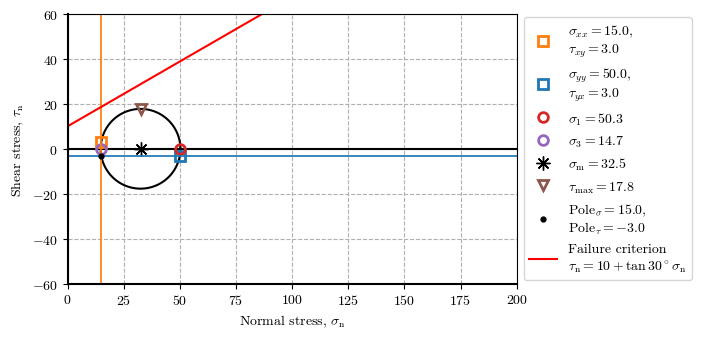

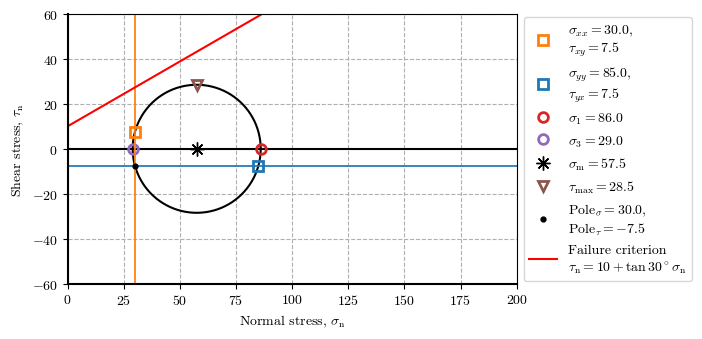

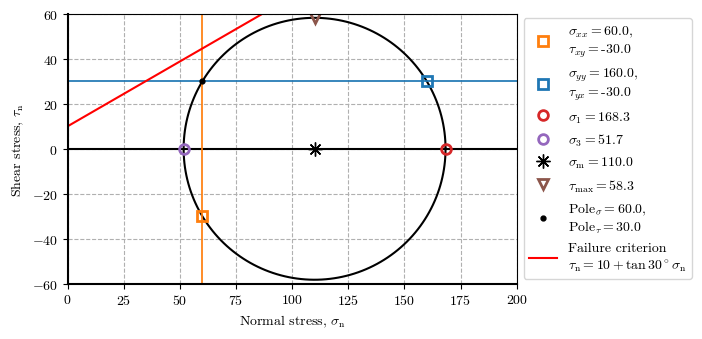

In [5]:
puntoX_etapa3 = plot_mohr_circle(𝜎_xx=15, 𝜎_yy=50, 𝜏_xy=3, envelope={'c': 10, '𝜙': 30}, plot_envelope=True, xlim=(00, 200), ylim=(-60, 60), plot_pole=True, figsize=[7.5, 3.5])
puntoY_etapa3 = plot_mohr_circle(𝜎_xx=30, 𝜎_yy=85, 𝜏_xy=7.5, envelope={'c': 10, '𝜙': 30}, plot_envelope=True, xlim=(00, 200), ylim=(-60, 60), plot_pole=True, figsize=[7.5, 3.5])
puntoZ_etapa3 = plot_mohr_circle(𝜎_xx=60, 𝜎_yy=160, 𝜏_xy=-30, envelope={'c': 10, '𝜙': 30}, plot_envelope=True, xlim=(00, 200), ylim=(-60, 60), plot_pole=True, figsize=[7.5, 3.5])

## Herramienta No. 2

Estado de esfuerzos en el mismo punto para diferentes etapas.

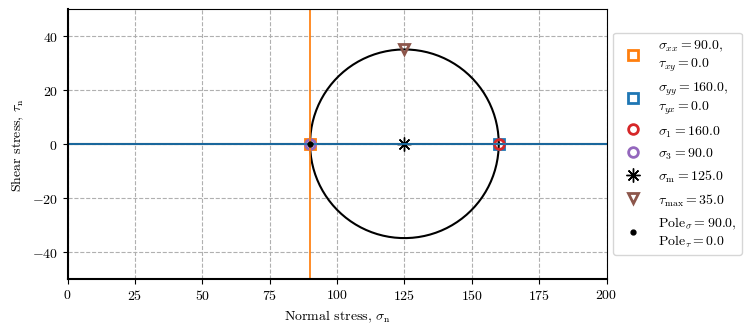

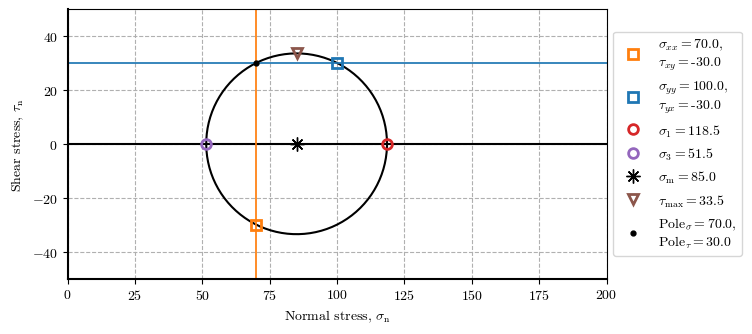

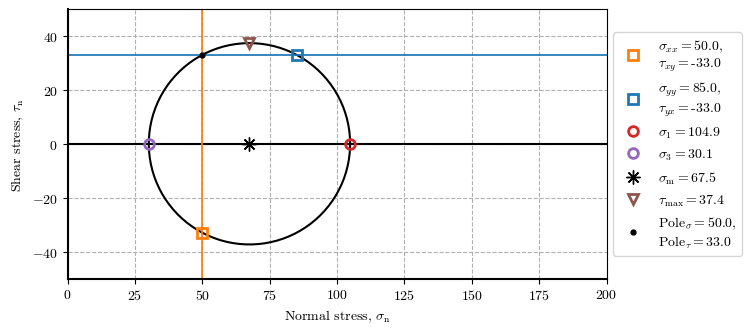

In [6]:
fig, slope1_ptX_stage1 = plot_mohr_circle(𝜎_xx=90, 𝜎_yy=160, 𝜏_xy=0, envelope={'c': 10, '𝜙': 30}, xlim=(0, 200), ylim=(-50, 50), plot_pole=True, figsize=[8,3.5])
fig, slope1_ptX_stage2 = plot_mohr_circle(𝜎_xx=70, 𝜎_yy=100, 𝜏_xy=-30, envelope={'c': 10, '𝜙': 30}, xlim=(0, 200), ylim=(-50, 50), plot_pole=True, figsize=[8,3.5])
fig, slope1_ptX_stage3 = plot_mohr_circle(𝜎_xx=50, 𝜎_yy=85, 𝜏_xy=-33, envelope={'c': 10, '𝜙': 30}, xlim=(0, 200), ylim=(-50, 50), plot_pole=True, figsize=[8,3.5])

## Herramienta No. 3
Trayectorias de tensiones

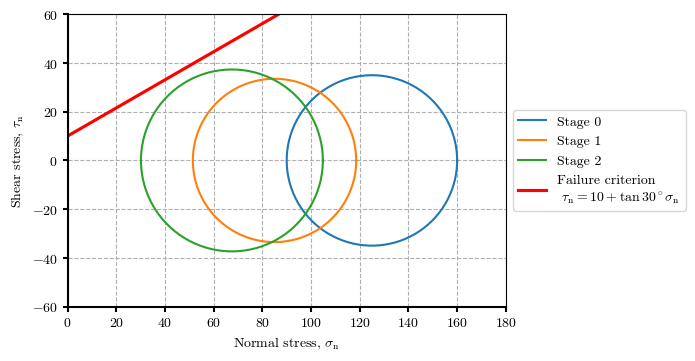

In [7]:
stages = [slope1_ptX_stage1, slope1_ptX_stage2, slope1_ptX_stage3]
fig = plot_all_mohr_circles(stages, envelope={'c': 10, '𝜙': 30}, xlim=(0, 180), ylim=(-60, 60), figsize=[8,3.5])

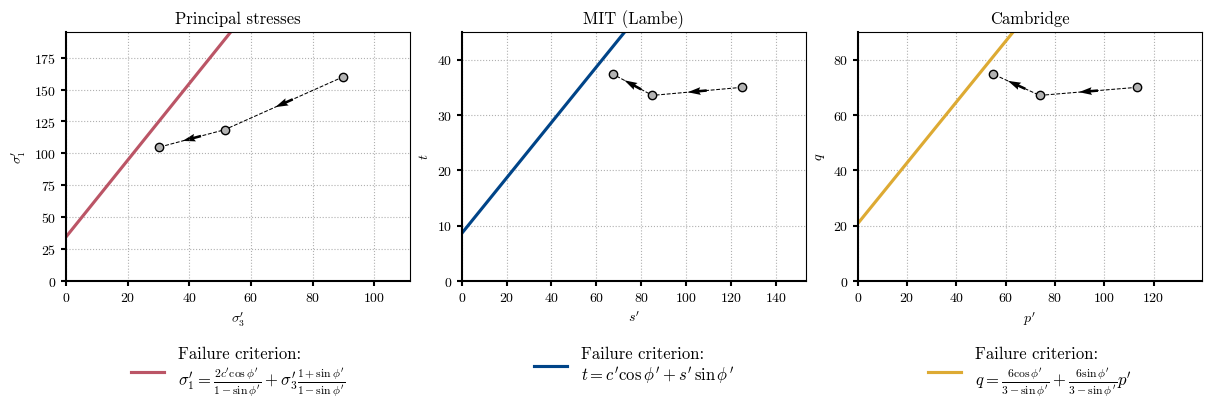

In [8]:
stages = (slope1_ptX_stage1, slope1_ptX_stage2, slope1_ptX_stage3)
fig = plot_stress_path(stages, envelope={'c': 10, '𝜙': 30}, figsize=[12, 4])